In [1]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [3]:
# Netflix Movies and TV Shows Analysis

#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load Dataset
df = pd.read_csv('netflix_titles.csv')

#  Preview Data
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values properly
df['rating'] = df['rating'].fillna('Unknown')
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')

# For date_added, fill with the most common date
most_common_date = df['date_added'].mode()[0]
df['date_added'] = df['date_added'].fillna(most_common_date)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [13]:
# Add Derived Columns

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Extract month
df['month_added'] = df['date_added'].dt.month_name()

# Count number of genres (for multi-genre entries)
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(', ')))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  month_added   8807 non-null   object        
 14  genre_count   8807 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(

<ipython-input-14-c6039f335fef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


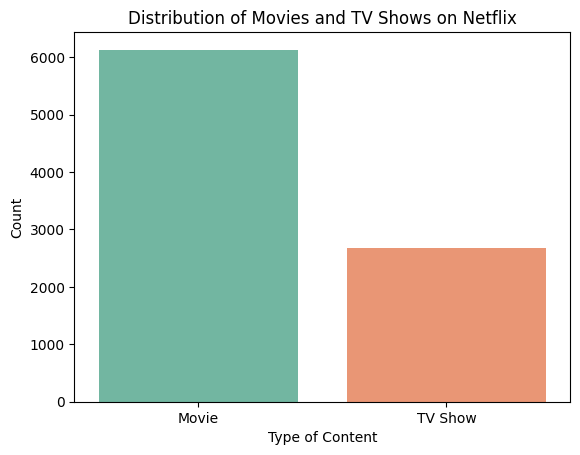

In [14]:
# Exploratory Data Analysis (EDA)
# Use visualizations and summary statistics to answer the following:

# Q1: What is the distribution of content type?

sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()


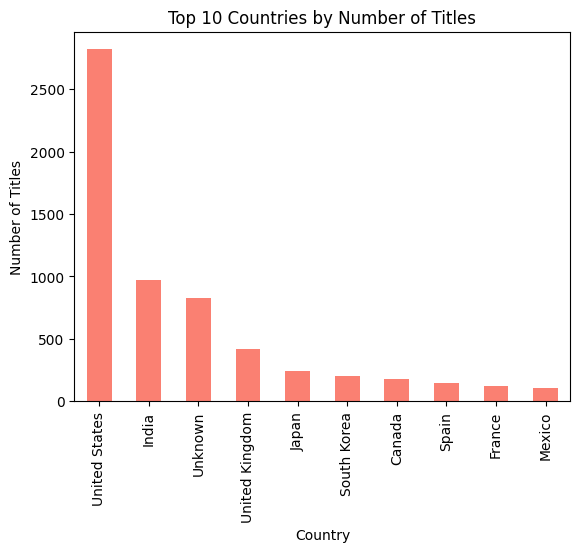

In [21]:
# Q2: Which countries produce the most content?

top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()


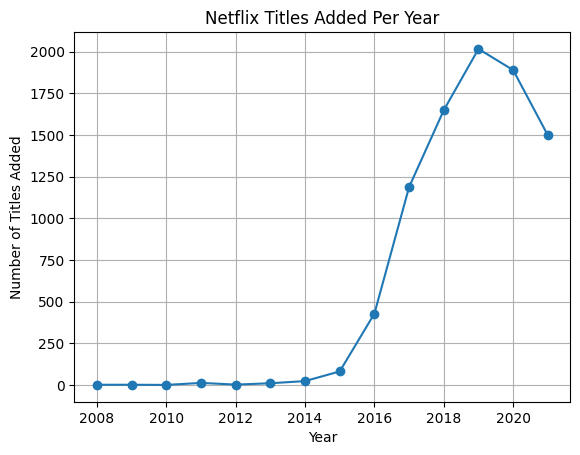

In [19]:
# Q3: How has content grown over the years?

df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Netflix Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


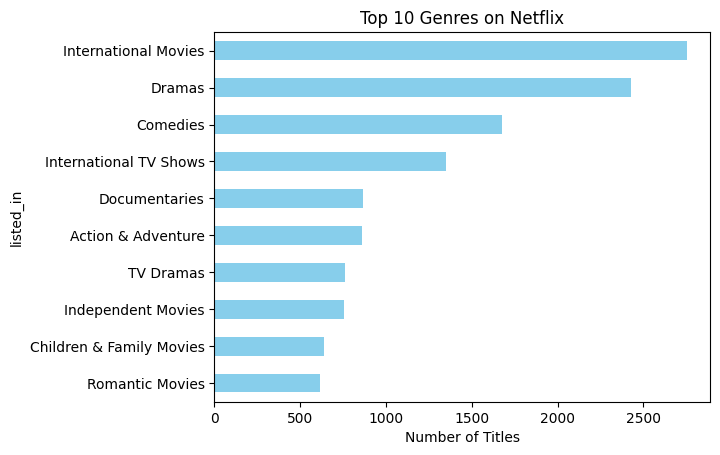

In [23]:
# Q4: What are the most common genres?

# Split genres and count them
genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres.value_counts().head(10)

top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()


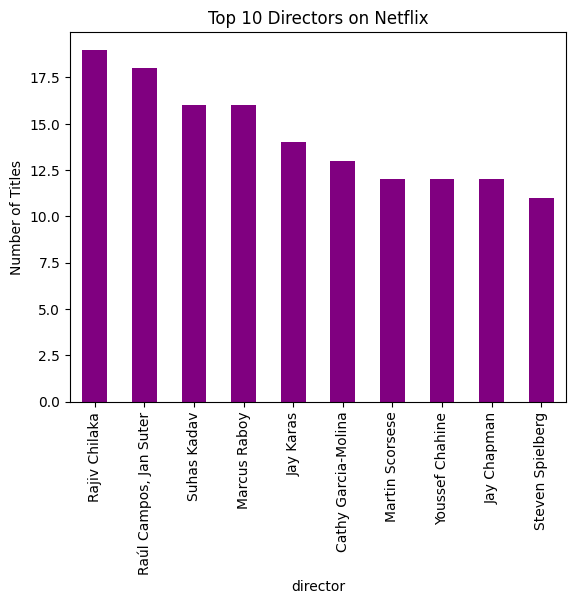

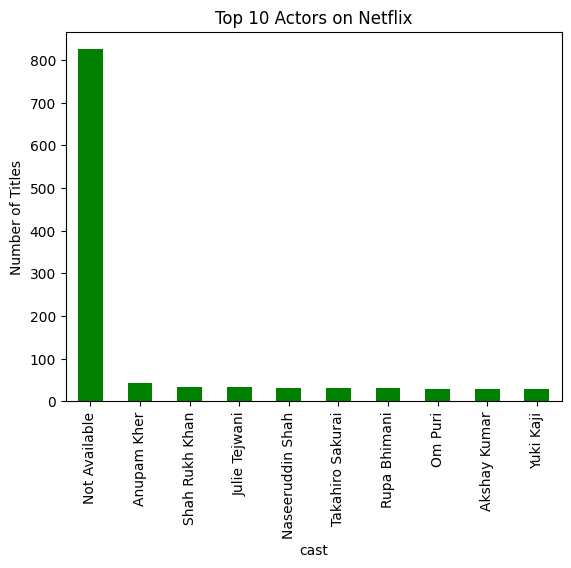

In [27]:
# Q5: Which directors or actors appear most frequently?

# Directors
top_directors = df[df['director'] != 'Not Available']['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='purple')
plt.title('Top 10 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()


# Actors
actors = df['cast'].dropna().str.split(', ').explode()
top_actors = actors.value_counts().head(10)
top_actors.plot(kind='bar', color='green')
plt.title('Top 10 Actors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()


## 🔍 Key Insights

- Movies make up the majority of Netflix content.
- The USA contributes the most titles to the platform.
- Netflix’s library grew significantly in 2017–2020.
- Most popular genres include International movies, Dramas, and Comedies.
- The most featured director is Rajiv Chilaka, and top actor is Anupam Kher.
